In [1]:
import pandas as pd
import networkx as nx
import numpy as np

In [2]:
salles = pd.read_excel('correspondancesDates.xlsx',sheetname='salles')
salles

,numero,nom,places,ordinateurs,priorité
0,1,Socrate,17,0,0.90
1,2,Platon,47,0,0.95
2,3,Aristote (Fablab),8,2,0.80
3,4,Archimède,21,0,1.00
4,5,Euclide,15,0,1.00
5,6,Osmium,25,25,0.98
6,7,Nickel,20,20,0.98
7,8,Césium,17,0,1.00
8,9,Mercure,17,0,1.00
9,10,Silicium,24,0,1.00


In [3]:
groupes = pd.read_excel('correspondancesDates.xlsx',sheetname='groupes')
groupes

,date,créneau,code,nom,places,ordinateurs,salle_prev
0,01/11/2018,matin,OR70001,MS MDR,30,0,NaN
1,01/11/2018,matin,OR70002,EXIOU A7,7,0,NaN
2,01/11/2018,matin,OR70007,EXIA A4,1,0,9.0
3,01/11/2018,matin,OR70003,RQQSE,20,0,NaN
4,01/11/2018,matin,OR70005,RIRE,7,7,NaN
5,01/11/2018,matin,OR70006,GEGE MAIS SI,14,14,NaN
6,01/11/2018,après-midi,OR70001,MS MDR,30,0,NaN
7,01/11/2018,après-midi,OR70002,EXIOU A7,7,0,NaN
8,01/11/2018,après-midi,OR70007,EXIA A4,1,0,NaN
9,01/11/2018,après-midi,OR70008,RIL2RIL,25,0,NaN


In [4]:
creneaux = groupes[['date','créneau']].drop_duplicates()
creneaux

,date,créneau
0,01/11/2018,matin
6,01/11/2018,après-midi
12,02/11/2018,matin
18,02/11/2018,après-midi
24,14/05/2018,matin


In [5]:
correspondances = nx.Graph()

correspondances.add_weighted_edges_from([((s['numero'], c['date'],c['créneau']),
                                          (g['code'],g['date'],g['créneau']),
                                          s['priorité']
                                          +(0.0 if (pd.isnull(g['salle_prev'])
                                                               or g['salle_prev'] != s['numero']) else 0.2) #bonus si déjà planifié
                                         + 0.2 * g['places']/s['places']) #prime à la salle bien remplie
                                         for indexCreneaux, c in creneaux.iterrows()
                                         for i,s in salles.iterrows()
                                         for j,g in groupes.iterrows()
                                         if (c['date'] == g['date']
                                             and c['créneau'] == g['créneau']
                                             and s['places'] >= g['places']
                                             and s['ordinateurs'] >= g['ordinateurs'])])

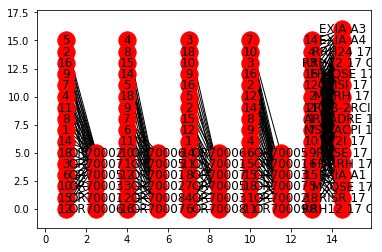

In [6]:
import matplotlib.pyplot as plt

cc_num=1
pos = dict()
labels = dict()

for cc in nx.connected_components(correspondances):
    X,Y = nx.bipartite.sets(correspondances.subgraph(cc))
    pos.update( (n, (cc_num, i)) for i, n in enumerate(X) )
    labels.update((n, n[0]) for i, n in enumerate(X) )
    pos.update( (n, (cc_num+1.5, i)) for i, n in enumerate(Y) )
    labels.update((n, n[0]) for i, n in enumerate(Y) )
    cc_num = cc_num + 3

nx.draw_networkx(correspondances, pos=pos, labels=labels)

plt.show()

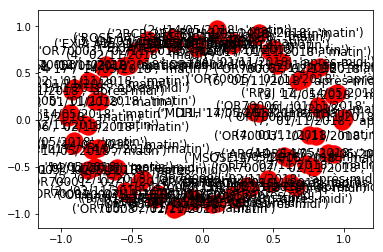

In [7]:
matching = nx.max_weight_matching(correspondances)

result = nx.DiGraph()
for k in matching:
    result.add_edge(k,matching[k])

nx.draw_networkx(result)
plt.show()

In [8]:
sortie = pd.DataFrame(columns = groupes.columns.append(pd.Index(['salle'])))

for i,g in groupes.iterrows():
    sRaw=[]
    for colName in groupes.columns:
        sRaw = sRaw + [g[colName]]
    try:
        sRaw = sRaw + [list(result.neighbors((g.code,g.date,g.créneau)))[0][0]]
    except nx.NetworkXError as err:
        print("Pas de salle trouvée pour la promo {} le {} ({}).".format(g.code,g.date,g.créneau))
        #print(format(err))
        sRaw = sRaw + [np.NaN]   
    sortie.loc[i] = sRaw
    
sortie

Pas de salle trouvée pour la promo RISR 17 le 14/05/2018 (matin).


,date,créneau,code,nom,places,ordinateurs,salle_prev,salle
0,01/11/2018,matin,OR70001,MS MDR,30,0,NaN,2
1,01/11/2018,matin,OR70002,EXIOU A7,7,0,NaN,14
2,01/11/2018,matin,OR70007,EXIA A4,1,0,9.0,9
3,01/11/2018,matin,OR70003,RQQSE,20,0,NaN,4
4,01/11/2018,matin,OR70005,RIRE,7,7,NaN,6
5,01/11/2018,matin,OR70006,GEGE MAIS SI,14,14,NaN,7
6,01/11/2018,après-midi,OR70001,MS MDR,30,0,NaN,2
7,01/11/2018,après-midi,OR70002,EXIOU A7,7,0,NaN,14
8,01/11/2018,après-midi,OR70007,EXIA A4,1,0,NaN,5
9,01/11/2018,après-midi,OR70008,RIL2RIL,25,0,NaN,15


In [ ]:
sortie.to_csv('resultat.csv', index=False)